In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import sequencer

In [3]:
data = np.loadtxt("../../Filtered_Flux_Grid_Phase")
print (data)

[[0.3249114  0.32248762 0.32010008 ... 0.13948274 0.13873163 0.13878515]
 [0.37018447 0.36712259 0.35775463 ... 0.14381223 0.14171008 0.13952144]
 [0.42066971 0.41987845 0.4091962  ... 0.14600546 0.14426381 0.14327899]
 ...
 [0.43592969 0.44032202 0.50020074 ... 0.28259828 0.28174928 0.28119872]
 [0.45379116 0.40729107 0.35632815 ... 0.25578569 0.28106574 0.28826551]
 [0.43367868 0.44682979 0.45146624 ... 0.21176573 0.21116941 0.21518151]]


In [4]:
offset_data = data *100+100
print(offset_data)

[[132.49114019 132.24876237 132.01000822 ... 113.9482741  113.87316318
  113.87851517]
 [137.0184467  136.71225852 135.77546293 ... 114.38122333 114.17100845
  113.95214392]
 [142.06697093 141.98784465 140.91961964 ... 114.60054591 114.42638086
  114.3278985 ]
 ...
 [143.59296912 144.0322018  150.02007389 ... 128.25982769 128.17492782
  128.11987176]
 [145.37911556 140.72910719 135.63281506 ... 125.57856886 128.10657392
  128.82655146]
 [143.36786805 144.68297945 145.14662367 ... 121.17657285 121.11694086
  121.51815079]]


Sequencer Code

In [5]:
x = np.linspace(3728.0, 7118.0, num=len(data[0]))
print(x)

[3728. 3730. 3732. ... 7114. 7116. 7118.]


In [6]:
indices = np.arange(len(offset_data))
np.random.shuffle(indices)

objects_list_shuffled = offset_data[indices]
grid = np.copy(x)

In [7]:
# define the list of distance metrics to consider.
# I don't include the KL-Divergence because the dataset contains zero values
estimator_list = ['EMD', 'energy', 'L2']

# define the sequencer object with default parameters
seq = sequencer.Sequencer(grid, offset_data, estimator_list)

# to execute the sequencer, we first need to define the output directory to which the different 
# outputs will be saved
output_path = "/Users/lerinalaluf/Desktop/SIP_2021/Personal_Code/Sequencer-master/sequencer_output"
final_elongation, final_sequence = seq.execute(output_path)

calculating the distance matrices for estimator: EMD, scale: 1
finished calculating this distance matrix list, it took: 7.531037330627441 seconds
calculating the distance matrices for estimator: EMD, scale: 2
finished calculating this distance matrix list, it took: 9.096055030822754 seconds
calculating the distance matrices for estimator: EMD, scale: 4
finished calculating this distance matrix list, it took: 8.788990020751953 seconds
calculating the distance matrices for estimator: EMD, scale: 8
finished calculating this distance matrix list, it took: 11.935573101043701 seconds
calculating the distance matrices for estimator: EMD, scale: 16
finished calculating this distance matrix list, it took: 19.369438409805298 seconds
calculating the distance matrices for estimator: EMD, scale: 32
finished calculating this distance matrix list, it took: 35.48264813423157 seconds
calculating the distance matrices for estimator: EMD, scale: 64
finished calculating this distance matrix list, it took:

/Users/lerinalaluf/Desktop/SIP_2021/Personal_Code/Sequencer-master/sequencer/sequencer_.py:1030: RuntimeWarning: divide by zero encountered in true_divide
  distance_matrix = 1.0 / proximity_matrix_copy


In [8]:
# print all the metrics and scales, and examine the intermediate elongations
estimator_list, scale_list, elongation_list = seq.return_elongation_of_weighted_products_all_metrics_and_scales()

print("intermediate elongations for the different metrics and scales:")
for i in range(len(estimator_list)):
    print("metric=%s, scale=%s, elongation: %s" % (estimator_list[i], 
                                                   scale_list[i], 
                                                   np.round(elongation_list[i], 2)))

intermediate elongations for the different metrics and scales:
metric=EMD, scale=1, elongation: 43.23
metric=EMD, scale=2, elongation: 30.92
metric=EMD, scale=4, elongation: 17.04
metric=EMD, scale=8, elongation: 28.63
metric=EMD, scale=16, elongation: 35.66
metric=EMD, scale=32, elongation: 38.08
metric=EMD, scale=64, elongation: 27.58
metric=energy, scale=1, elongation: 45.23
metric=energy, scale=2, elongation: 30.09
metric=energy, scale=4, elongation: 17.38
metric=energy, scale=8, elongation: 27.17
metric=energy, scale=16, elongation: 32.53
metric=energy, scale=32, elongation: 33.3
metric=energy, scale=64, elongation: 28.42
metric=L2, scale=1, elongation: 21.7
metric=L2, scale=2, elongation: 17.86
metric=L2, scale=4, elongation: 22.66
metric=L2, scale=8, elongation: 23.53
metric=L2, scale=16, elongation: 22.58
metric=L2, scale=32, elongation: 25.41
metric=L2, scale=64, elongation: 15.07


In [9]:
print(final_sequence)
np.savetxt('../../phase_sequence', final_sequence, "%i")

[134 135  43  40  38  42  41  37 166  39  36 167  34 168  35  33 164 195
 163 191 193 161 194 192  28  78   4  29 187 189  79  30 188  62  99 165
 190  31  74  77  32  61  76  72  73  75  47 156 159 183 181 184 157  21
 182  85  93 185 180  22 155 158 186  86  23 121  46  45  98 123 119  25
 179 160  52 124 178  26 115 154  24  53 125 114 153 116  27  97 128 177
 118   3 102 130 117 113 104  20  71 131 129 112  19 120  96   2 127 122
 111 132 126  18 110 133 109 108 151 150  90 149  91 101 148  59  92  67
  89  68  60  69  70  88 147 152  49 146 176  12  51 175   0  13  10 145
  14   9  15  11 144   8  84   1 143 174   7  58 142  16   6  63  64  87
 103   5  65  17 141  48  50 140  66 105 106 173  83 107 172  82 138  56
  55 100 171  57  81  54  80 137  94 170  95 136 162 169 139  44]


[[0.44880353 0.49306035 0.53230477 ... 0.1582928  0.17567563 0.18879408]
 [0.38851348 0.39658534 0.38689108 ... 0.21945444 0.21828584 0.22142328]
 [0.367507   0.3640944  0.35913332 ... 0.16318531 0.16312703 0.16270123]
 ...
 [0.42151011 0.42553927 0.43048546 ... 0.2373947  0.23660415 0.23677642]
 [0.44401282 0.4458714  0.44905233 ... 0.14810203 0.14718887 0.14507109]
 [0.18400889 0.1766329  0.16359192 ... 0.34598056 0.3482251  0.34968552]]


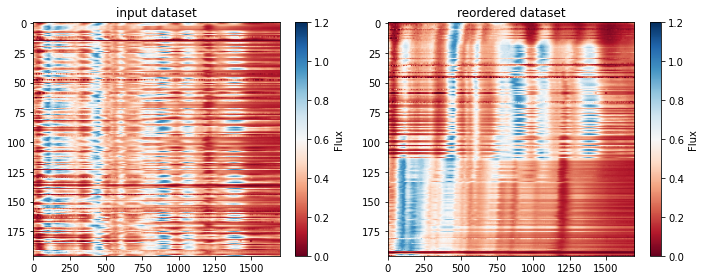

In [10]:
reordered_data = data[final_sequence, :]
np.random.shuffle(data)
print (data)
plt.figure(1, figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("input dataset")
plt.imshow(data, cmap="RdBu", aspect='auto')
plt.clim(0, 1.2)
plt.colorbar(label = 'Flux')

plt.subplot(1, 2, 2)
plt.title("reordered dataset")
plt.imshow(reordered_data, cmap="RdBu", aspect='auto')
plt.clim(0, 1.2)
plt.colorbar(label = 'Flux')

plt.tight_layout()
plt.savefig('../../phase_Image.pdf', dpi = 300, bbox_inches = 'tight')

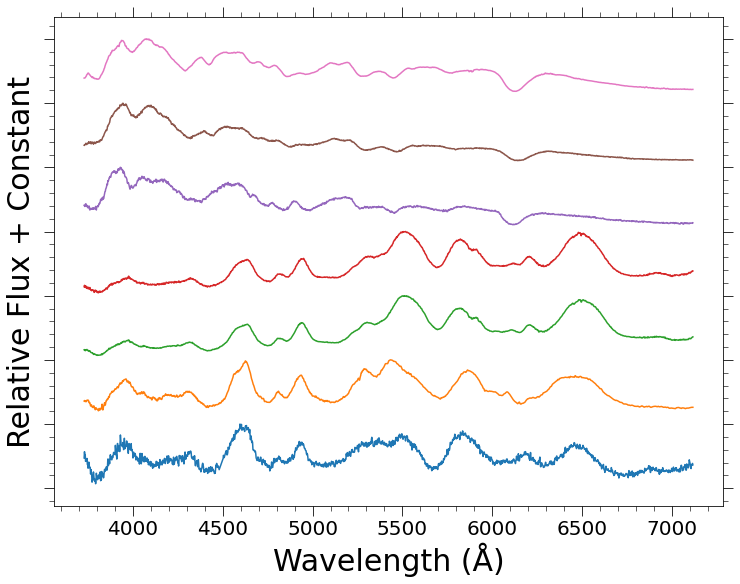

In [11]:
data = np.loadtxt("../../Filtered_Flux_Grid_Phase")

wavelength = []
x = 3728.0

while len(wavelength) < len(data[0]):
    wavelength.append(x)
    x += 2

plt.figure(figsize=(12,9))
plt.xlabel("Wavelength (Å)", fontsize = 30)
plt.ylabel("Relative Flux + Constant", fontsize = 30)

plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)

plt.gca().axes.yaxis.set_ticklabels([])

k=0
while k < (len(final_sequence)):
    k+=1
    if k % 25 == 0:
        plt.plot(wavelength, data[final_sequence[k]]+k/25)

plt.savefig('../../phase.pdf', dpi = 300, bbox_inches = 'tight')